In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/home/john/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/john/.fastai/data/oxford-iiit-pet/images')]

In [4]:
files = get_image_files(path/"images")

In [5]:
len(files)

7390

In [9]:
# true for cats, false for dogs
def label_func(f): return f[0].isupper()

In [7]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


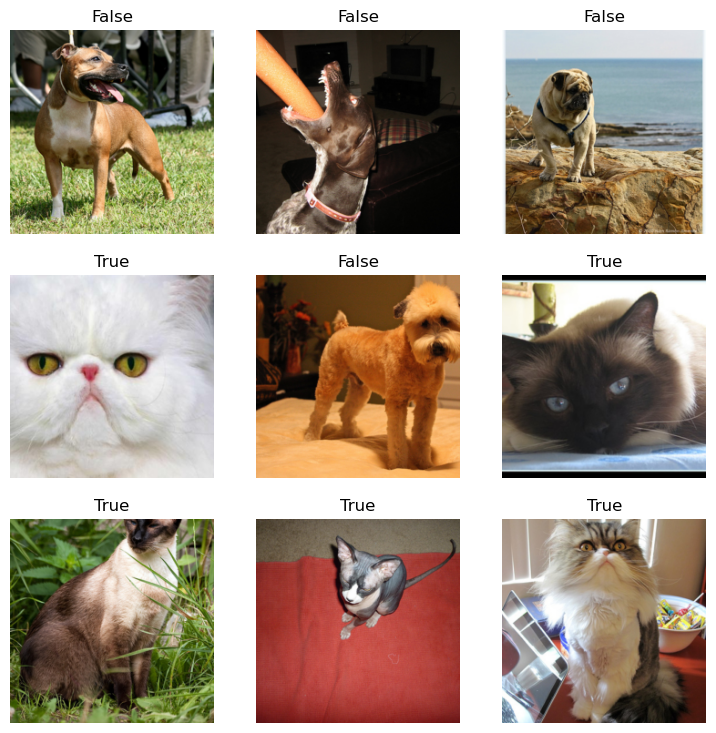

In [8]:
dls.show_batch()

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/john/mambaforge/envs/scratch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.144913,0.027232,0.010149,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.058816,0.018839,0.007442,00:56


In [12]:
learn.predict(files[0])

('False', tensor(0), tensor([1.0000e+00, 1.7056e-07]))

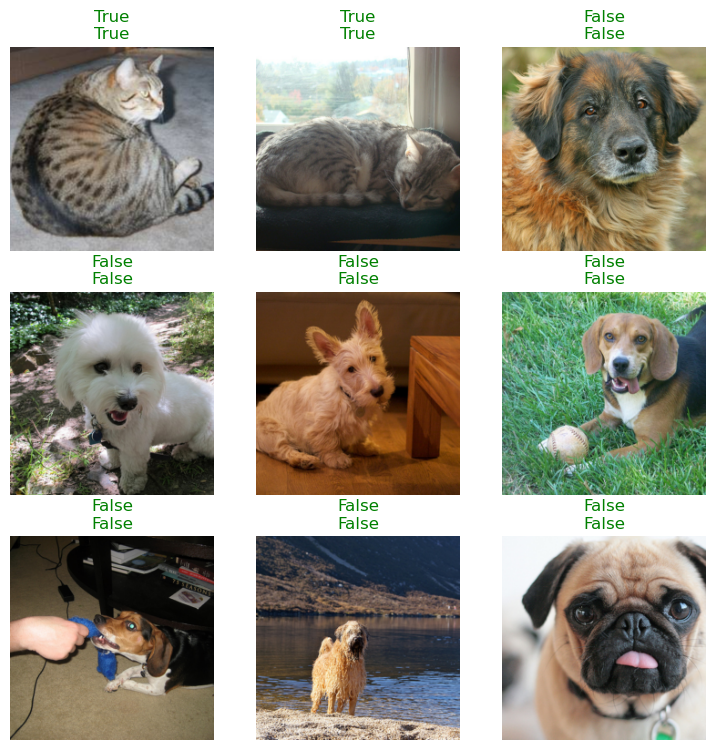

In [13]:
learn.show_results()